# TIME SERIES Without imputing the missing days in the dataset.

# Start(1.In this notebook,till now--Analysis of 'Oil Investment')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Company Stock and Investment.csv')

In [4]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [5]:
df=df[['Date','Gold Investments']]

In [6]:
df.head(35)

,Date,Gold Investments
0,31-12-2009,0.000150
1,04-01-2010,0.001097
2,05-01-2010,0.001560
3,06-01-2010,0.006009
4,07-01-2010,0.000221
5,08-01-2010,-0.013097
6,11-01-2010,0.023297
7,12-01-2010,-0.001518
8,13-01-2010,-0.020847
9,14-01-2010,0.009758


In [7]:
df.tail()

,Date,Gold Investments
1979,09-11-2017,0.000623
1980,10-11-2017,-0.000389
1981,13-11-2017,-0.004944
1982,14-11-2017,-0.002621
1983,15-11-2017,0.005963


In [8]:
#df.sort_index()

# Converting to datetime format

In [9]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df.head()

,Date,Gold Investments
0,2009-12-31,0.000150
1,2010-04-01,0.001097
2,2010-05-01,0.001560
3,2010-06-01,0.006009
4,2010-07-01,0.000221


In [11]:
df.tail()

,Date,Gold Investments
1979,2017-09-11,0.000623
1980,2017-10-11,-0.000389
1981,2017-11-13,-0.004944
1982,2017-11-14,-0.002621
1983,2017-11-15,0.005963


# Setting the 'Date' feature as index

In [12]:
df_Gold=df

In [13]:
df_Gold.set_index('Date',inplace=True)

In [14]:
df_Gold.head()

,Gold Investments
Date,
2009-12-31,0.000150
2010-04-01,0.001097
2010-05-01,0.001560
2010-06-01,0.006009
2010-07-01,0.000221


In [15]:
df_Gold.head()

,Gold Investments
Date,
2009-12-31,0.000150
2010-04-01,0.001097
2010-05-01,0.001560
2010-06-01,0.006009
2010-07-01,0.000221


# Analysis Start(A,B,C)

# A)Checking for white noise

In [16]:
df_Gold.index.nunique() 

1984

# All unique values ,  i.e  No white noise in data(No duplicate index).
# We can proceed with time series analysis.

In [17]:
df_Gold.shape

(1984, 1)

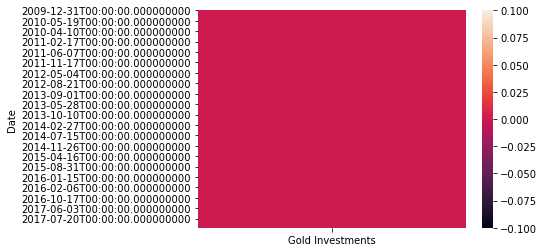

In [18]:
import seaborn as sns
sns.heatmap(df_Gold.isnull())

# CREATING TRAIN,VALIDATION AND TESTING DATASET

In [19]:
df_Gold_train=df_Gold['2009-12-31':'2013-12-31']#2009(just 1 data),2010,2011,2012,2013 end  = 5years span

In [20]:
df_Gold_train.tail()

,Gold Investments
Date,
2013-12-24,-1.000000
2013-12-26,0.000000
2013-12-27,0.000000
2013-12-30,-0.008234
2013-12-31,-1.000000


In [21]:
df_Gold_val=df_Gold['2014-1-1':'2016-12-31']# 2years

In [22]:
df_Gold_val.tail()

,Gold Investments
Date,
2016-12-23,-1.000000
2016-12-27,0.000000
2016-12-28,0.000000
2016-12-29,0.009959
2016-12-30,-1.000000


In [23]:
df_Gold_test=df_Gold['2016-12-31':'2017-11-15'] # 1year

In [24]:
df_Gold_test.tail()

,Gold Investments
Date,
2017-09-11,0.000623
2017-10-11,-0.000389
2017-11-13,-0.004944
2017-11-14,-0.002621
2017-11-15,0.005963


## Step 2: Visualize the Data

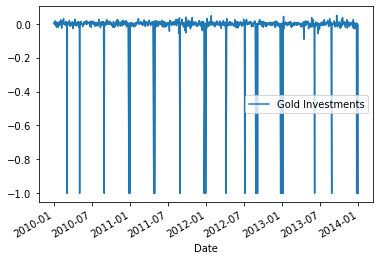

In [25]:
df_Gold_train.plot()

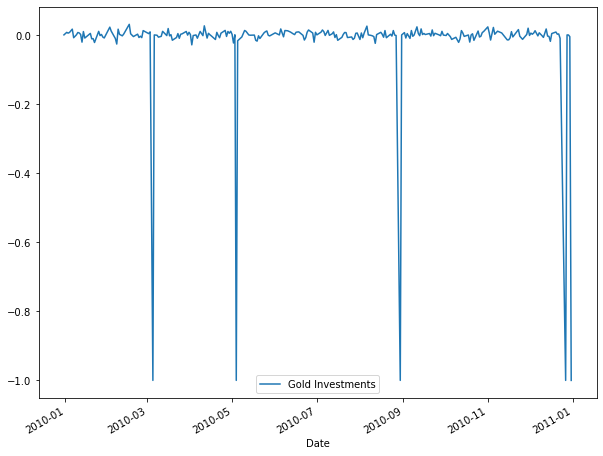

In [26]:
df_Gold_train['2009-12-31':'2010-12-31'].plot(figsize=(10,8))

# B)Selecting the model after visualization above

###### In above plot data looks non-seasonal /  irregular .

   Usually in seasonal data we use SARIMAX.
           in irregular(non-seasonal) we use ARIMAX.
           
   Here we will implement ARIMAX as our data looks non-seasonal /  irregular.
   Before that,Now

###### we will check if data is STATIONARY or not.

# df_oil--> we will implement ARIMAX as our data looks non-seasonal / irregular

# C)Testing For Stationarity

In [27]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [28]:
test_result=adfuller(df_Gold_train['Gold Investments']) # adfuller give us 5 values

In [29]:
  # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-12.546113903284633, 2.2585069143653668e-23, 3, 1003, {'1%': -3.436886505235454, '5%': -2.8644259034265493, '10%': -2.568306590825728}, -1049.7236249532978)


### Most important value is p-value above(2nd value(0.0))

# Ho(null hypothesis): time series is non-stationary          
# H1(altenative): time series is stationary

# Step-1.Rolling/Addfuller

In [30]:
#Ho: It is non stationary
#H1: It is stationary
#considered 0.05 in general.

def adfuller_test(sales):
    result=adfuller(sales) 
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), Hence reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [31]:
adfuller_test(df_Gold_train['Gold Investments']) #call the function

ADF Test Statistic : -12.546113903284633
p-value : 2.2585069143653668e-23
#Lags Used : 3
Number of Observations Used : 1003
strong evidence against the null hypothesis(Ho), Hence reject the null hypothesis. Data  is stationary


## Auto Regressive Model(AR)--Just for visualization
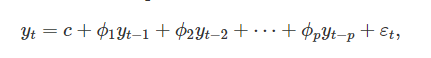

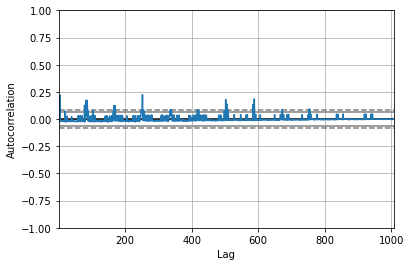

In [32]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_Gold_train['Gold Investments']) 
plt.show()

# Plotting ACF(Autocorrelation) & PACF(Partial Autocorrelation)

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

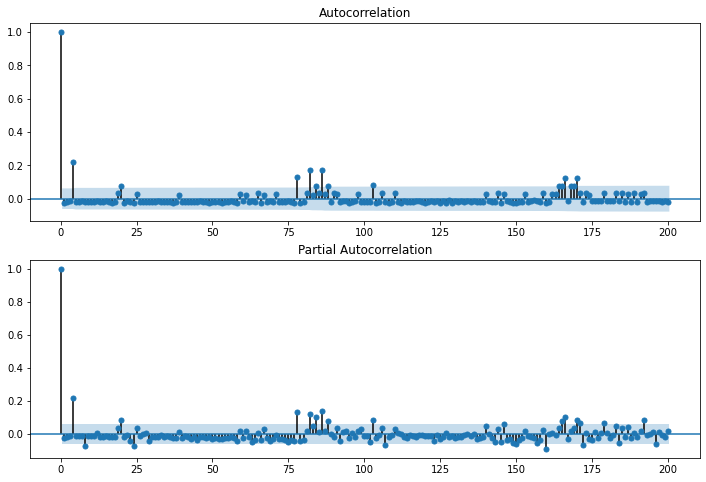

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(df_Gold_train['Gold Investments'],lags=200,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_Gold_train['Gold Investments'],lags=200,ax=ax2)

# D)Model Building-->Arima model Implementation

In [35]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima_model import ARIMA

# Training the model(df_oil)

# Converting date/time index to period[D] as our data is in days.

In [36]:
#df_Gold_train.index = pd.DatetimeIndex(df_Gold_train.index).to_period('D')
                         #changing the dataframe index to period in days
    #this is done to silence the warning of feeding a datetime format in the index

In [37]:
model=ARIMA(df_Gold_train['Gold Investments'],order=(1,1,1)) # this order is p d q(0 or 1) 
results=model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignor

In [38]:
#This above Warning is making the model forecast all the values as constant.

In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.Gold Investments   No. Observations:                 1006
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 523.145
Method:                       css-mle   S.D. of innovations              0.143
Date:                Wed, 04 Nov 2020   AIC                          -1038.289
Time:                        18:29:38   BIC                          -1018.634
Sample:                             1   HQIC                         -1030.821
                                                                              
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.256e-05   1.52e-05     -0.827      0.408   -4.23e-05    1.72e-05
ar.L1.D.Gold Investments    -0.0239      0.032     -0.741      0.459      -0.087       0.039
ma.L1.D.Gold Investments    -1.0000      0.003   -386.525      0.000      -1.005      -0.995
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -41.8267           +0.0000j           41.8267            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [40]:
results.forecast(10) #interpretation??

(array([-0.00292063, -0.02677182, -0.02621444, -0.02624062, -0.02625285,
        -0.02626541, -0.02627797, -0.02629052, -0.02630308, -0.02631563]),
 array([0.1433561 , 0.14339706, 0.14339709, 0.14339709, 0.14339709,
        0.14339709, 0.14339709, 0.14339709, 0.14339709, 0.14339709]),
 array([[-0.28389342,  0.27805216],
        [-0.3078249 ,  0.25428126],
        [-0.30726756,  0.25483869],
        [-0.30729374,  0.25481251],
        [-0.30730597,  0.25480028],
        [-0.30731854,  0.25478771],
        [-0.30733109,  0.25477516],
        [-0.30734365,  0.2547626 ],
        [-0.3073562 ,  0.25475005],
        [-0.30736876,  0.25473749]]))

# Testing accuracy on training set

In [41]:
df_Gold_train['2012-01-02':'2013-12-31']

,Gold Investments
Date,
2012-03-01,0.000000
2012-04-01,0.009387
2012-05-01,-0.008679
2012-06-01,0.010944
2012-09-01,-0.000928
...,...
2013-12-24,-1.000000
2013-12-26,0.000000
2013-12-27,0.000000


<ipython-input-42-d64521692bef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Gold_train['forecast']=results.predict(start='2012-01-02',end='2013-12-31',dynamic=True)


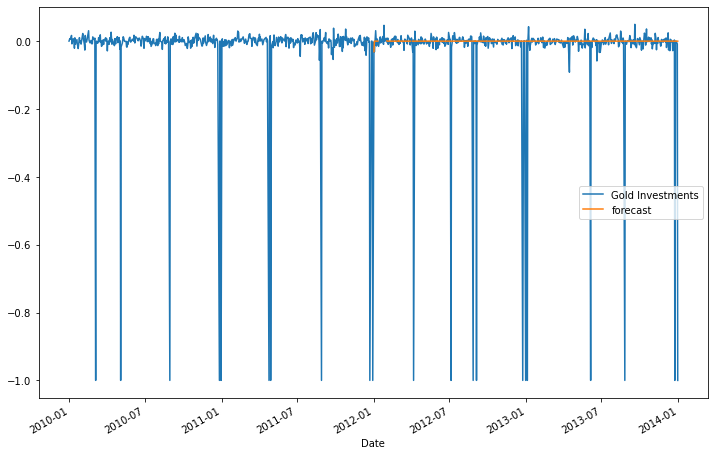

In [42]:
df_Gold_train['forecast']=results.predict(start='2012-01-02',end='2013-12-31',dynamic=True)
df_Gold_train[['Gold Investments','forecast']].plot(figsize=(12,8))

In [43]:
### In Above fig.The orange line is not overlapping on the blue line path,i.e model accuracy is not good.


In [44]:
#Model is predicting all values are constant
#this is because of the warning while fitting the data.
#ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

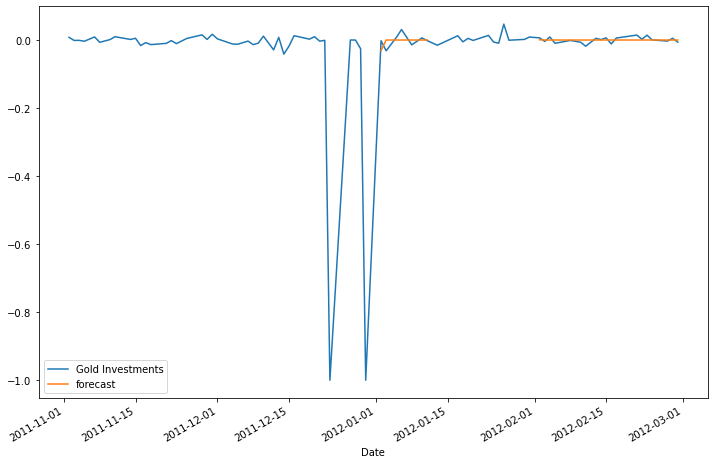

In [45]:
df_Gold_train[['Gold Investments','forecast']]['2011-11-02':'2012-02-29'].plot(figsize=(12,8))


In [46]:
df_Gold_train['2012-01-02':'2012-01-31']

,Gold Investments,forecast
Date,,
2012-01-13,-0.015352,NaN
2012-01-17,0.012534,NaN
2012-01-18,-0.005435,NaN
2012-01-19,0.004857,NaN
2012-01-20,-0.001208,NaN
2012-01-23,0.013612,NaN
2012-01-24,-0.005968,NaN
2012-01-25,-0.009307,NaN
2012-01-26,0.046667,NaN


In [47]:
#We can see except a few point all other points are same,constant(-0.000013)
#Upward movement of graph from loss position(-ve) to 0 i.e no profit no gain situation seen in the data is due to the points in satrt.